In [5]:
!pip install mlflow boto3 awscli

In [6]:
!aws configure

AWS Access Key ID [****************63XG]: 
AWS Secret Access Key [****************5NiQ]: 
Default region name [us-east-1]: 
Default output format [None]: 


In [9]:
import mlflow
# Step 2: Set up the MLflow tracking server
mlflow.set_tracking_uri("http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/")

In [10]:
# Set or create an experiment
mlflow.set_experiment("Exp 2 - BoW vs TfIdf")

2025/07/31 09:02:37 INFO mlflow.tracking.fluent: Experiment with name 'Exp 2 - BoW vs TfIdf' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://mlflow-bucket-laavanjan-1/460962868907142916', creation_time=1753952557601, experiment_id='460962868907142916', last_update_time=1753952557601, lifecycle_stage='active', name='Exp 2 - BoW vs TfIdf', tags={}>

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [12]:
df = pd.read_csv('/content/reddit_preprocessing.csv').dropna(subset=['clean_comment'])
df.shape

(21311, 2)

In [15]:
import pandas as pd # Make sure pandas is imported if not already

# Drop rows where 'category' is NaN
df.dropna(subset=['category'], inplace=True)

# Convert 'category' column to integer type after dropping NaNs,
# as it's likely representing integer categories (-1, 0, 1)
df['category'] = df['category'].astype(int)

# Now proceed with your function definition and calls
# ... (your run_experiment function and loop) ...

In [16]:
# Step 1: Function to run the experiment
def run_experiment(vectorizer_type, ngram_range, vectorizer_max_features, vectorizer_name):
    # Step 2: Vectorization
    if vectorizer_type == "BoW":
        vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=vectorizer_max_features)
    else:
        vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=vectorizer_max_features)

    X_train, X_test, y_train, y_test = train_test_split(df['clean_comment'], df['category'], test_size=0.2, random_state=42, stratify=df['category'])

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    # Step 4: Define and train a Random Forest model
    with mlflow.start_run() as run:
        # Set tags for the experiment and run
        mlflow.set_tag("mlflow.runName", f"{vectorizer_name}_{ngram_range}_RandomForest")
        mlflow.set_tag("experiment_type", "feature_engineering")
        mlflow.set_tag("model_type", "RandomForestClassifier")

        # Add a description
        mlflow.set_tag("description", f"RandomForest with {vectorizer_name}, ngram_range={ngram_range}, max_features={vectorizer_max_features}")

        # Log vectorizer parameters
        mlflow.log_param("vectorizer_type", vectorizer_type)
        mlflow.log_param("ngram_range", ngram_range)
        mlflow.log_param("vectorizer_max_features", vectorizer_max_features)

        # Log Random Forest parameters
        n_estimators = 200
        max_depth = 15

        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)

        # Initialize and train the model
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)

        # Step 5: Make predictions and log metrics
        y_pred = model.predict(X_test)

        # Log accuracy
        accuracy = accuracy_score(y_test, y_pred)
        mlflow.log_metric("accuracy", accuracy)

        # Log classification report
        classification_rep = classification_report(y_test, y_pred, output_dict=True)
        for label, metrics in classification_rep.items():
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}", value)

        # Log confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix: {vectorizer_name}, {ngram_range}")
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()

        # Log the model
        mlflow.sklearn.log_model(model, f"random_forest_model_{vectorizer_name}_{ngram_range}")

# Step 6: Run experiments for BoW and TF-IDF with different n-grams
ngram_ranges = [(1, 1), (1, 2), (1, 3)]  # unigrams, bigrams, trigrams
max_features = 5000  # Example max feature size

for ngram_range in ngram_ranges:
    # BoW Experiments
    run_experiment("BoW", ngram_range, max_features, vectorizer_name="BoW")

    # TF-IDF Experiments
    run_experiment("TF-IDF", ngram_range, max_features, vectorizer_name="TF-IDF")

2025/07/31 09:12:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/31 09:12:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run BoW_(1, 1)_RandomForest at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916/runs/70236896dbc145af832f8ad9a7e88dfe
🧪 View experiment at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916


2025/07/31 09:12:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/31 09:12:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF_(1, 1)_RandomForest at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916/runs/452eb760844c4a57bb978a5b96ed72d0
🧪 View experiment at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916


2025/07/31 09:12:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/31 09:12:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run BoW_(1, 2)_RandomForest at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916/runs/1db307bba7234d47954b2028f6c1825d
🧪 View experiment at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916


2025/07/31 09:12:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/31 09:12:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF_(1, 2)_RandomForest at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916/runs/2eb1d359b60c4567a24079c15f5a7531
🧪 View experiment at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916


2025/07/31 09:12:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/31 09:12:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run BoW_(1, 3)_RandomForest at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916/runs/e9eb24e8bd7d4238a6e0c5ea10e8cbc9
🧪 View experiment at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916


2025/07/31 09:13:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/31 09:13:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF_(1, 3)_RandomForest at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916/runs/3571b0dfe8a0485183c99980154dc898
🧪 View experiment at: http://ec2-34-201-57-163.compute-1.amazonaws.com:5000/#/experiments/460962868907142916


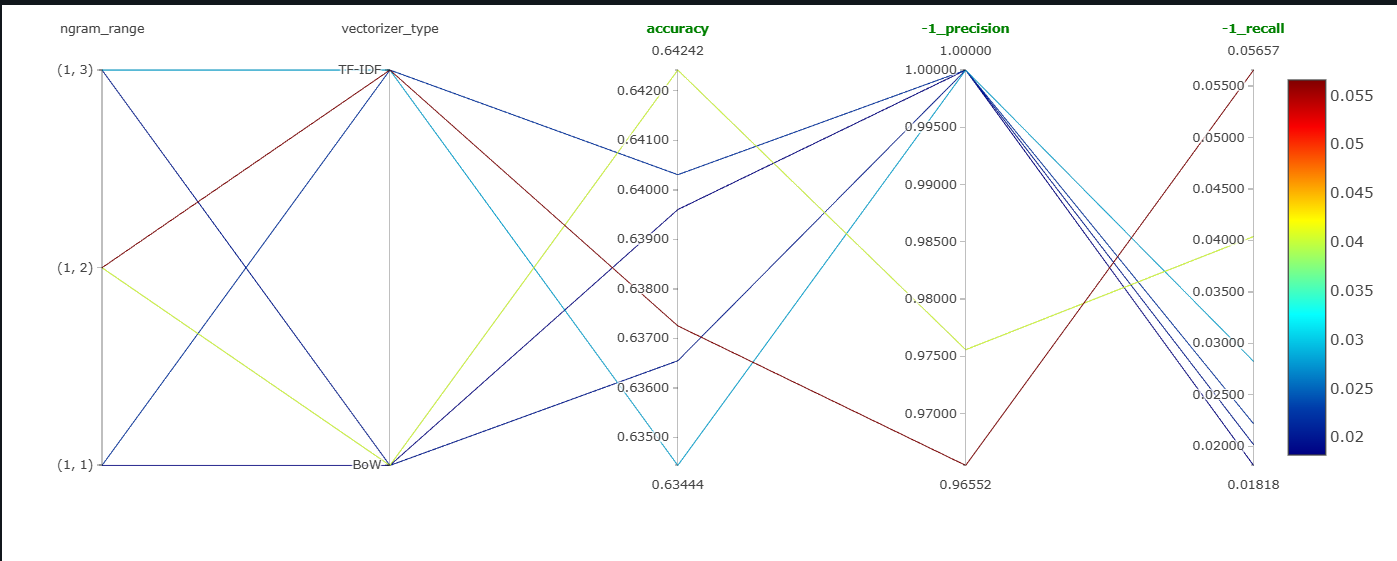

# Ti grams with TF-IDF vectorization